In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Input, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


In [29]:
train=pd.read_csv("MNIST/mnist_train.csv")
test=pd.read_csv("MNIST/mnist_test.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values

In [31]:
x_train=x_train/255.0
x_train=x_train.reshape((60000,28,28,1))

In [32]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values

In [33]:
x_test=x_test/255.0

In [34]:
model = Sequential()
model.add(Conv2D(32,(3,3) , activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_15 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 batch_normalization_16 (Ba  (None, 9216)            

In [35]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=11,batch_size=215)

Epoch 1/11
224/224 [==============================] - 22s 96ms/step - loss: 0.8031 - accuracy: 0.8963 - val_loss: 3.8453 - val_accuracy: 0.4790
Epoch 2/11
224/224 [==============================] - 21s 94ms/step - loss: 0.1324 - accuracy: 0.9621 - val_loss: 0.4614 - val_accuracy: 0.9025
Epoch 3/11
224/224 [==============================] - 21s 95ms/step - loss: 0.0837 - accuracy: 0.9747 - val_loss: 0.0914 - val_accuracy: 0.9778
Epoch 4/11
224/224 [==============================] - 22s 97ms/step - loss: 0.0658 - accuracy: 0.9811 - val_loss: 0.2588 - val_accuracy: 0.9310
Epoch 5/11
224/224 [==============================] - 21s 95ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.1099 - val_accuracy: 0.9774
Epoch 6/11
224/224 [==============================] - 22s 97ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.1048 - val_accuracy: 0.9788
Epoch 7/11
224/224 [==============================] - 22s 96ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.2161 - val_accuracy:

In [36]:
x_test=x_test.reshape((10000,28,28,1))

In [37]:
pred=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [40]:
loss,accuracy = model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.0921 - accuracy: 0.9815


In [38]:
print(y_test)
print(np.argmax(pred,axis=1))


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


2


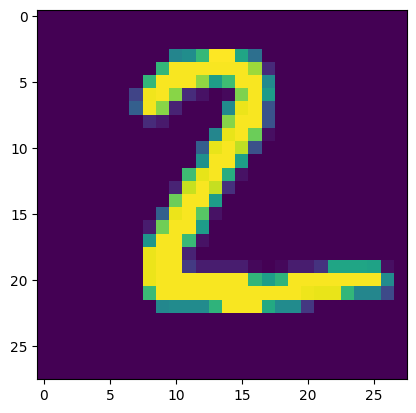

In [48]:
import matplotlib.pyplot as plt
idx= 1
plt.imshow(x_test[idx].reshape(28,28))
print(pred[idx].argmax())

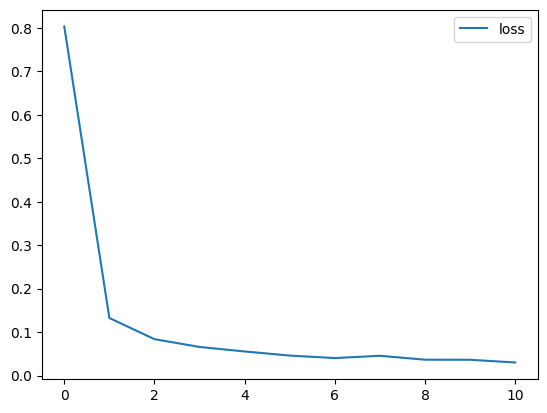

In [51]:
plt.plot(history.history['loss'],label='loss')

plt.legend()
plt.show()

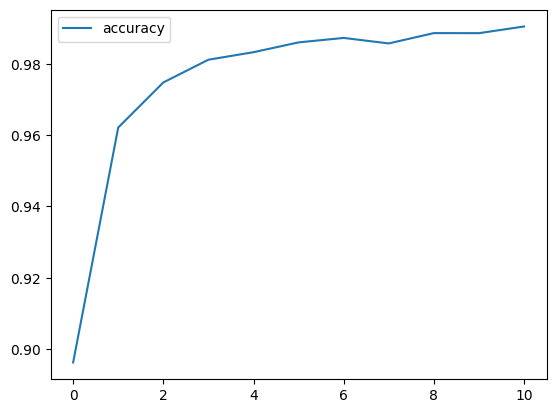

In [50]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()